In [22]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import make_classification


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df1 = pd.read_json('/content/drive/MyDrive/office dataset for tesing/Bulbuli_11_March_14_March/CowID_642_S1006_03_11_2022.json')
df2 = pd.read_json('/content/drive/MyDrive/office dataset for tesing/Bulbuli_11_March_14_March/CowID_642_S1006_03_12_2022.json')
df3 = pd.read_json('/content/drive/MyDrive/office dataset for tesing/Bulbuli_11_March_14_March/CowID_642_S1006_03_13_2022.json')
df4 = pd.read_json('/content/drive/MyDrive/office dataset for tesing/Bulbuli_11_March_14_March/CowID_642_S1006_03_14_2022.json')


In [25]:
# solution 1 (fast)
df = pd.concat([df1,df2, df3,df4],           # Append DataFrames
                      ignore_index = True,
                      sort = False)
print(df)

                     timestamp   x  y  z  rumination  standing  eating
0      2022-03-10 18:00:00.000 -60 -6  0           1         0       0
1      2022-03-10 18:00:00.500 -59 -6  0           1         0       0
2      2022-03-10 18:00:01.000 -63 -4 -1           1         0       0
3      2022-03-10 18:00:01.500 -60 -5  0           1         0       0
4      2022-03-10 18:00:02.000 -61 -5 -3           1         0       0
...                        ...  .. .. ..         ...       ...     ...
585217 2022-03-14 17:59:56.500 -61 -3 -4           0         0       0
585218 2022-03-14 17:59:57.000 -60 -4 -2           0         0       0
585219 2022-03-14 17:59:57.500 -61 -4 -5           0         0       0
585220 2022-03-14 17:59:58.000 -60 -2 -4           0         0       0
585221 2022-03-14 17:59:58.500 -60 -5 -4           0         0       0

[585222 rows x 7 columns]


In [26]:
df = df.iloc[: , 1:]

In [27]:
print(df)

         x  y  z  rumination  standing  eating
0      -60 -6  0           1         0       0
1      -59 -6  0           1         0       0
2      -63 -4 -1           1         0       0
3      -60 -5  0           1         0       0
4      -61 -5 -3           1         0       0
...     .. .. ..         ...       ...     ...
585217 -61 -3 -4           0         0       0
585218 -60 -4 -2           0         0       0
585219 -61 -4 -5           0         0       0
585220 -60 -2 -4           0         0       0
585221 -60 -5 -4           0         0       0

[585222 rows x 6 columns]


In [28]:
count0 = (df['rumination'] == 0).sum()
count1 = (df['rumination'] == 1).sum()

In [29]:
print('rumination percentage =',count1/(count0+count1)*100,'%')

rumination percentage = 24.370580736882754 %


In [30]:
count0 = (df['standing'] == 0).sum()
count1 = (df['standing'] == 1).sum()
print('standing percentage =',count1/(count0+count1)*100,'%')

standing percentage = 51.86185755149329 %


In [31]:
count0 = (df['eating'] == 0).sum()
count1 = (df['eating'] == 1).sum()
print('eating percentage =',count1/(count0+count1)*100,'%')

eating percentage = 18.760914661444716 %


In [32]:
X= df.iloc[:,0:3]
y = df['rumination']
print(X)
print(y)

         x  y  z
0      -60 -6  0
1      -59 -6  0
2      -63 -4 -1
3      -60 -5  0
4      -61 -5 -3
...     .. .. ..
585217 -61 -3 -4
585218 -60 -4 -2
585219 -61 -4 -5
585220 -60 -2 -4
585221 -60 -5 -4

[585222 rows x 3 columns]
0         1
1         1
2         1
3         1
4         1
         ..
585217    0
585218    0
585219    0
585220    0
585221    0
Name: rumination, Length: 585222, dtype: int64


# Preprocessing the data

In [33]:
# handling imbalance dataset
#from imblearn.over_sampling import SMOTE

#rus =SMOTE()# fit predictor and target variable
#x_rus, y_rus = rus.fit_resample(X, y)
#print('original dataset shape x,y:', X.count(),y.count())
#print('Resample dataset shape', x_rus.count(),y_rus.count())

In [34]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
X_train

array([[ 0.66099046,  0.6491749 , -0.77391844],
       [ 1.01391023,  1.68394347, -0.8693261 ],
       [-0.04484908, -0.23037837,  0.84801178],
       ...,
       [ 0.89627031,  1.21829761,  2.75616499],
       [-0.04484908, -1.16167008, -0.58310312],
       [-0.51540878, -0.02342466,  0.46638114]])

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import initializers

In [38]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 3, kernel_initializer = 'normal', activation = 'relu', input_dim = 3))
# Adding the second hidden layer
classifier.add(Dense(units = 500, kernel_initializer = 'normal', activation = 'relu'))
classifier.add(Dense(units = 1000, kernel_initializer = 'normal', activation = 'relu'))
classifier.add(Dense(units = 500, kernel_initializer = 'normal', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid'))


In [39]:

# Compiling the ANN 
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size = 1000, epochs = 50,verbose = 1)

Epoch 1/50
410/410 [==============================] - 49s 118ms/step - loss: 0.4455 - accuracy: 0.7586
Epoch 2/50
410/410 [==============================] - 48s 117ms/step - loss: 0.4309 - accuracy: 0.7665
Epoch 3/50
410/410 [==============================] - 48s 117ms/step - loss: 0.4300 - accuracy: 0.7673
Epoch 4/50
410/410 [==============================] - 48s 116ms/step - loss: 0.4287 - accuracy: 0.7694
Epoch 5/50
410/410 [==============================] - 48s 117ms/step - loss: 0.4282 - accuracy: 0.7700
Epoch 6/50
410/410 [==============================] - 48s 117ms/step - loss: 0.4276 - accuracy: 0.7709
Epoch 7/50
410/410 [==============================] - 48s 117ms/step - loss: 0.4274 - accuracy: 0.7710
Epoch 8/50
410/410 [==============================] - 48s 117ms/step - loss: 0.4273 - accuracy: 0.7709
Epoch 9/50
410/410 [==============================] - 48s 117ms/step - loss: 0.4270 - accuracy: 0.7716
Epoch 10/50
410/410 [==============================] - 48s 117ms/step - l

In [40]:
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

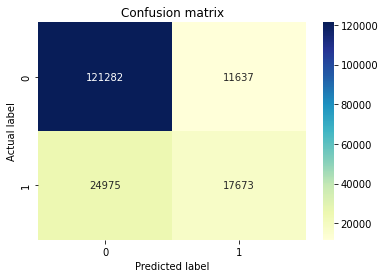

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
d=134663
e=8164
f=d+e
a=17647
b=15093
c=a+b
print("correct 0 predicting as 0 %",d/f*100 )
print("incorrect 0 predicting as 1 %",e/f *100)
print("incorrect 1 predicting as 0 %",a/c*100)
print("correct 1 predicting as 1 %",b/c *100)

correct 0 predicting as 0 % 94.28399392271768
incorrect 0 predicting as 1 % 5.716006077282307
incorrect 1 predicting as 0 % 53.900427611484425
correct 1 predicting as 1 % 46.099572388515575


## **Classification report for precision, recall f1-score and accuracy**

In [44]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87    132919
           1       0.60      0.41      0.49     42648

    accuracy                           0.79    175567
   macro avg       0.72      0.66      0.68    175567
weighted avg       0.77      0.79      0.78    175567



# **THis is for standing**

In [45]:
X= df.iloc[:,0:3]
y = df['standing']
print(X)
print(y)

         x  y  z
0      -60 -6  0
1      -59 -6  0
2      -63 -4 -1
3      -60 -5  0
4      -61 -5 -3
...     .. .. ..
585217 -61 -3 -4
585218 -60 -4 -2
585219 -61 -4 -5
585220 -60 -2 -4
585221 -60 -5 -4

[585222 rows x 3 columns]
0         0
1         0
2         0
3         0
4         0
         ..
585217    0
585218    0
585219    0
585220    0
585221    0
Name: standing, Length: 585222, dtype: int64


# Preprocessing the data

In [46]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
X_train

array([[-0.04534231,  0.02775278,  0.17956197],
       [-0.63361003, -0.59259891,  0.37034989],
       [-0.16299586,  0.85488837,  0.46574385],
       ...,
       [ 0.89588602,  1.21676019,  2.75519888],
       [-0.04534231, -1.16125462, -0.5835897 ],
       [-0.51595648, -0.02394319,  0.46574385]])

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import initializers

In [51]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))

# Adding the second hidden layer
classifier.add(Dense(units = 1000, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1000, epochs = 10,verbose = 0)
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

46818/46818 [==============================] - 97s 2ms/step - loss: 0.4217 - accuracy: 0.8104
Train score: 0.4217261075973511
Train accuracy: 0.810377299785614
********************
11705/11705 [==============================] - 24s 2ms/step - loss: 0.4253 - accuracy: 0.8078
Test score: 0.4253009855747223
Test accuracy: 0.8078175187110901


In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

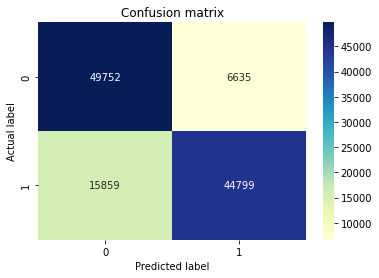

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **Classification report for precision, recall f1-score and accuracy**

In [54]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82     56387
           1       0.87      0.74      0.80     60658

    accuracy                           0.81    117045
   macro avg       0.81      0.81      0.81    117045
weighted avg       0.82      0.81      0.81    117045



# This is for **eating**

In [55]:
X= df.iloc[:,0:3]
y = df['eating']
print(X)
print(y)

         x  y  z
0      -60 -6  0
1      -59 -6  0
2      -63 -4 -1
3      -60 -5  0
4      -61 -5 -3
...     .. .. ..
585217 -61 -3 -4
585218 -60 -4 -2
585219 -61 -4 -5
585220 -60 -2 -4
585221 -60 -5 -4

[585222 rows x 3 columns]
0         0
1         0
2         0
3         0
4         0
         ..
585217    0
585218    0
585219    0
585220    0
585221    0
Name: eating, Length: 585222, dtype: int64


# Preprocessing the data

In [56]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
X_train

array([[-0.04534231,  0.02775278,  0.17956197],
       [-0.63361003, -0.59259891,  0.37034989],
       [-0.16299586,  0.85488837,  0.46574385],
       ...,
       [ 0.89588602,  1.21676019,  2.75519888],
       [-0.04534231, -1.16125462, -0.5835897 ],
       [-0.51595648, -0.02394319,  0.46574385]])

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import initializers

In [61]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))

# Adding the second hidden layer
classifier.add(Dense(units = 1000, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1000, epochs = 10,verbose = 0)
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

46818/46818 [==============================] - 99s 2ms/step - loss: 0.3255 - accuracy: 0.8505
Train score: 0.32554468512535095
Train accuracy: 0.850503146648407
********************
11705/11705 [==============================] - 23s 2ms/step - loss: 0.3225 - accuracy: 0.8528
Test score: 0.322497695684433
Test accuracy: 0.8527831435203552


In [62]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

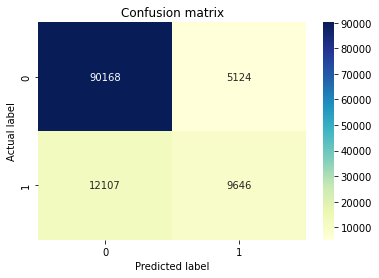

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **Classification report for precision, recall f1-score and accuracy**

In [64]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     95292
           1       0.65      0.44      0.53     21753

    accuracy                           0.85    117045
   macro avg       0.77      0.69      0.72    117045
weighted avg       0.84      0.85      0.84    117045

